In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Imports

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import os
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import cv2
# !pip uninstall tqdm
# !pip install tqdm
from tqdm import tqdm
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import numpy as np
import sys
# !pip install torchsummary
from torchsummary import summary
import copy 
import random
# !pip uninstall tensorflow-gpu

!pip install mtcnn
from mtcnn.mtcnn import MTCNN
# !pip install tensorflow-gpu

!pip install facenet-pytorch
from facenet_pytorch import MTCNN, InceptionResnetV1, prewhiten, training
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter

Using TensorFlow backend.


# Define Dataset and load data

In [0]:
class FaceDataset(Dataset):
    def __init__(self, root='/content/drive/My Drive/BP_faces/', augment=False):
        self.root_dir = root
        self.image = []
        self.annotation = []
        # self.image_color = []
        # transforms
        self.transform_with_normalization = transforms.Compose([
                transforms.Resize((128, 128)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5],
                                     std=[0.5] )
                ])
        self.transform_resize = transforms.Compose([
                transforms.Resize((128, 128)),
                transforms.ToTensor(),
                prewhiten
                ])
        # load image
        catagories = ["Jennie", "Jisoo", "Lisa", "Rose"]
        # catagories = ["BTS J-Hope", "BTS Jimin", "BTS Jin", "BTS Jungkook", "BTS RM"]
        for cnt, member in tqdm(enumerate(catagories)):
            print("member name: " + member + ", Catagory: " + str(cnt))
            img_lst = sorted(os.listdir(root + member + '/'))
            for cnt1, img in tqdm(enumerate(img_lst)):
                # if cnt1 == 100:
                #     break
                if img.endswith(".jpg"):
                    # self.image_color.append(self.transform_color_image(Image.open(root + '/input/' + image)))
                    self.image.append(Image.open(root + member + '/' + img).convert('L'))
                    self.annotation.append(cnt)

    def __len__(self):
        return len(self.image)
                       
    def __getitem__(self, idx):
        image_trans = self.transform_with_normalization(self.image[idx])
        anno = self.annotation[idx]
        return image_trans, anno 
full_dataset = FaceDataset()





0it [00:00, ?it/s]




0it [00:00, ?it/s]




32it [00:00, 297.12it/s]

member name: Jennie, Catagory: 0







70it [00:00, 316.01it/s]




88it [00:00, 214.00it/s]




104it [00:01, 35.01it/s]




116it [00:05,  9.36it/s]




125it [00:07,  6.13it/s]




131it [00:09,  4.75it/s]




136it [00:11,  4.05it/s]




139it [00:12,  3.75it/s]




142it [00:13,  3.63it/s]




144it [00:13,  3.66it/s]




146it [00:14,  3.70it/s]




147it [00:14,  3.85it/s]




148it [00:15,  3.13it/s]




149it [00:15,  3.54it/s]




150it [00:15,  3.28it/s]




151it [00:15,  3.25it/s]




152it [00:16,  3.23it/s]




153it [00:16,  3.12it/s]




154it [00:16,  3.12it/s]




155it [00:17,  3.52it/s]




156it [00:17,  3.33it/s]




157it [00:17,  3.10it/s]




158it [00:18,  2.94it/s]




159it [00:18,  3.00it/s]




160it [00:18,  3.39it/s]




161it [00:19,  3.25it/s]




162it [00:19,  2.88it/s]




163it [00:19,  3.14it/s]




164it [00:20,  3.06it/s]




165it [00:20,  3.11it/s]




166it [00:20,  3.14it/s]




167it [00:20,  3.59it/s]




168it [00:21,  3.92it/s]




169it [00:21,  3.60it/s]




170it [00

member name: Jisoo, Catagory: 1







73it [00:00, 346.64it/s]




101it [00:00, 188.01it/s]




117it [00:05, 10.18it/s] 




129it [00:09,  6.01it/s]




137it [00:11,  4.73it/s]




143it [00:13,  4.16it/s]




148it [00:15,  3.67it/s]




151it [00:16,  3.40it/s]




154it [00:17,  3.42it/s]




156it [00:18,  3.37it/s]




158it [00:18,  3.16it/s]




159it [00:19,  2.91it/s]




160it [00:19,  3.00it/s]




161it [00:19,  3.59it/s]




162it [00:19,  3.95it/s]




163it [00:20,  3.58it/s]




164it [00:20,  3.52it/s]




165it [00:20,  3.43it/s]




166it [00:21,  3.32it/s]




167it [00:21,  2.63it/s]




168it [00:21,  2.82it/s]




169it [00:22,  2.63it/s]




170it [00:22,  2.78it/s]




171it [00:23,  2.79it/s]




172it [00:23,  2.87it/s]




173it [00:23,  2.99it/s]




174it [00:24,  3.00it/s]




175it [00:24,  2.96it/s]




176it [00:24,  2.62it/s]




177it [00:25,  2.65it/s]




178it [00:25,  2.17it/s]




179it [00:26,  2.32it/s]




180it [00:26,  2.70it/s]




181it [00:26,  2.74it/s]




182it [

member name: Lisa, Catagory: 2







81it [00:00, 411.81it/s]




101it [00:00, 99.44it/s]




116it [00:05, 10.77it/s]




127it [00:08,  6.59it/s]




135it [00:11,  4.71it/s]




141it [00:13,  4.07it/s]




145it [00:14,  3.76it/s]




148it [00:14,  3.95it/s]




151it [00:15,  3.59it/s]




153it [00:16,  3.51it/s]




155it [00:17,  3.11it/s]




156it [00:17,  3.05it/s]




157it [00:18,  2.74it/s]




158it [00:18,  3.25it/s]




159it [00:18,  3.66it/s]




160it [00:18,  3.92it/s]




161it [00:19,  3.39it/s]




162it [00:19,  3.64it/s]




163it [00:19,  3.26it/s]




164it [00:20,  3.07it/s]




165it [00:20,  2.88it/s]




166it [00:20,  3.00it/s]




167it [00:21,  2.95it/s]




168it [00:21,  3.00it/s]




169it [00:21,  2.95it/s]




170it [00:22,  3.21it/s]




171it [00:22,  3.23it/s]




172it [00:22,  3.84it/s]




173it [00:22,  3.57it/s]




174it [00:23,  3.54it/s]




175it [00:23,  3.37it/s]




176it [00:23,  2.79it/s]




177it [00:24,  3.06it/s]




178it [00:24,  3.08it/s]




179it [00

member name: Rose, Catagory: 3







101it [00:00, 244.13it/s]




117it [00:05, 10.47it/s] 




128it [00:09,  5.69it/s]




136it [00:12,  4.31it/s]




142it [00:14,  3.95it/s]




146it [00:15,  3.73it/s]




149it [00:16,  3.59it/s]




152it [00:17,  3.38it/s]




154it [00:17,  3.40it/s]




156it [00:18,  3.70it/s]




157it [00:18,  3.47it/s]




158it [00:18,  3.59it/s]




159it [00:19,  3.47it/s]




160it [00:19,  3.74it/s]




161it [00:19,  3.01it/s]




162it [00:20,  2.58it/s]




163it [00:20,  2.75it/s]




164it [00:21,  2.82it/s]




165it [00:21,  2.87it/s]




166it [00:21,  2.89it/s]




167it [00:22,  2.96it/s]




168it [00:22,  2.64it/s]




169it [00:22,  2.75it/s]




170it [00:23,  3.25it/s]




171it [00:23,  3.26it/s]




172it [00:23,  3.15it/s]




173it [00:24,  3.08it/s]




174it [00:24,  3.05it/s]




175it [00:24,  3.44it/s]




176it [00:24,  3.32it/s]




177it [00:25,  3.30it/s]




178it [00:25,  3.77it/s]




179it [00:25,  4.22it/s]




180it [00:25,  4.55it/s]




181it [

In [0]:
test_set = 1
train_size = int(0.90 * len(full_dataset))
if test_set:
    validation_size = int((len(full_dataset) - train_size) / 2)
    test_size = len(full_dataset) - train_size - validation_size

    train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, validation_size, test_size])

    train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
    validation_data_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=8, shuffle=True)
    test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True)
else:
    validation_size = int((len(full_dataset) - train_size))

    train_dataset, validation_dataset = torch.utils.data.random_split(full_dataset, [train_size, validation_size])

    train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
    validation_data_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=8, shuffle=True)

# Define CNN and see summary

##Facenet

In [0]:
class Facenet(nn.Module):
    def conv_layer_1(self, input_channel, output_channel, kernel_size=3):
        layer = nn.Sequential(
            nn.Conv2d(kernel_size=kernel_size, in_channels=input_channel, out_channels=output_channel, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(output_channel),
        )
        return layer

    def conv_layer_2(self, input_channel, output_channel, kernel_size=3):
        layer = nn.Sequential(
            nn.Conv2d(kernel_size=kernel_size, in_channels=input_channel, out_channels=output_channel, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(output_channel),
            nn.Conv2d(kernel_size=kernel_size, in_channels=output_channel, out_channels=output_channel, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(output_channel),
        )
        return layer

    def __init__(self, input_channel, output_channel, imsize=128, group_size=7):
        super(Facenet, self).__init__()
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.layer1 = self.conv_layer_1(input_channel, 64)
        self.layer2 = self.conv_layer_1(64, 128)
        self.layer3 = self.conv_layer_2(128, 256)
        self.layer4 = self.conv_layer_2(256, 256)
        # 128/2^(number of max_pools)
        self.fc1 = nn.Linear(8*8*256, 1024)
        self.fc2 = nn.Linear(1024, group_size)

    def forward(self, x):
        out_layer1 = self.layer1(x)
        pool1 = self.max_pool(out_layer1)

        out_layer2 = self.layer2(pool1)
        pool2 = self.max_pool(out_layer2)

        out_layer3 = self.layer3(pool2)
        pool3 = self.max_pool(out_layer3)

        out_layer4 = self.layer4(pool3)
        pool4 = self.max_pool(out_layer4)

        flat = pool4.view(pool4.size(0), -1)
        fc_out1 = self.fc1(flat)
        fc_out2 = self.fc2(fc_out1)
        return F.log_softmax(fc_out2, dim=1)

##FacenetA

In [0]:
class FacenetA(nn.Module):
    def conv_layer_1(self, input_channel, output_channel, kernel_size=3):
        layer = nn.Sequential(
            nn.Conv2d(kernel_size=kernel_size, in_channels=input_channel, out_channels=output_channel, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(output_channel),
        )
        return layer

    def conv_layer_2(self, input_channel, output_channel, kernel_size=3):
        layer = nn.Sequential(
            nn.Conv2d(kernel_size=kernel_size, in_channels=input_channel, out_channels=output_channel, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(output_channel),
            nn.Conv2d(kernel_size=kernel_size, in_channels=output_channel, out_channels=output_channel, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(output_channel),
        )
        return layer

    def __init__(self, input_channel, output_channel, imsize=128, group_size=7):
        super(FacenetA, self).__init__()
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.layer1 = self.conv_layer_1(input_channel, 64)
        self.layer2 = self.conv_layer_1(64, 128)
        self.layer3 = self.conv_layer_2(128, 256)
        self.layer4 = self.conv_layer_2(256, 512)
        self.layer5 = self.conv_layer_2(512, 512)
        # 128/2^(number of max_pools)
        self.fc1 = nn.Linear(4*4*512, 2048)
        self.fc2 = nn.Linear(2048, 2048)
        self.fc3 = nn.Linear(2048, group_size)

    def forward(self, x):
        out_layer1 = self.layer1(x)
        pool1 = self.max_pool(out_layer1)

        out_layer2 = self.layer2(pool1)
        pool2 = self.max_pool(out_layer2)

        out_layer3 = self.layer3(pool2)
        pool3 = self.max_pool(out_layer3)

        out_layer4 = self.layer4(pool3)
        pool4 = self.max_pool(out_layer4)

        out_layer5 = self.layer5(pool4)
        pool5 = self.max_pool(out_layer5)

        flat = pool5.view(pool5.size(0), -1)
        fc_out1 = self.fc1(flat)
        fc_out2 = self.fc2(fc_out1)
        fc_out3 = self.fc3(fc_out2)
        return F.log_softmax(fc_out3, dim=1)

In [0]:
catagories = sorted(os.listdir('/content/drive/My Drive/BTS_faces/'))
print(len(catagories))
model = FacenetA(1,len(catagories))

# Bring model to GPU
if torch.cuda.is_available():
  model.cuda()
  summary(model, (1,128,128))
else: 
  print("no cuda")

7
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]             640
              ReLU-2         [-1, 64, 128, 128]               0
       BatchNorm2d-3         [-1, 64, 128, 128]             128
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5          [-1, 128, 64, 64]          73,856
              ReLU-6          [-1, 128, 64, 64]               0
       BatchNorm2d-7          [-1, 128, 64, 64]             256
         MaxPool2d-8          [-1, 128, 32, 32]               0
            Conv2d-9          [-1, 256, 32, 32]         295,168
             ReLU-10          [-1, 256, 32, 32]               0
      BatchNorm2d-11          [-1, 256, 32, 32]             512
           Conv2d-12          [-1, 256, 32, 32]         590,080
             ReLU-13          [-1, 256, 32, 32]               0
      BatchNorm2d-14          [-1, 25

## setup loss and start a toy train example

In [0]:
# criterion = nn.CrossEntropyLoss()
# testCri = mCrossEntropy()
criterion = nn.NLLLoss()
# criterion = nn.MSELoss()
# criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [0]:
epochs = 1

loader = train_data_loader
for e in range(epochs):
    print("#############")
    print("EPOCHS: " + str(e) + "#")
    print("#############")
    running_loss = 0
    model.train()
    for images, labels in tqdm(loader):
        if torch.cuda.is_available():
            # print "cuda detected"
            images = images.cuda()
            labels = labels.cuda()
        else: 
            print("no cuda")
            
        log_ps = model(images)
        if type(criterion).__name__ == "CrossEntropyLoss":
            loss = criterion(log_ps, labels.squeeze(1).long())
        elif type(criterion).__name__ == "NLLLoss":
            # sigmoid = torch.sigmoid(log_ps)
            loss = criterion(log_ps, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Training loss: {}".format(running_loss / len(loader)))

In [0]:
dataiter = iter(test_data_loader)
images, labels = dataiter.next()
img = images[1]
print(labels)
img = img.unsqueeze(0)
ps = torch.exp(model(img.cuda()))
print(ps)
top_p, top_class = ps.topk(1, dim=1)
print(top_p, top_class)


tensor([4, 2, 0, 4, 5, 3, 1, 2])
tensor([[4.6260e-07, 1.1715e-03, 9.9883e-01, 5.4099e-07, 3.9914e-07, 4.7696e-08,
         3.5612e-15]], device='cuda:0', grad_fn=<ExpBackward>)
tensor([[0.9988]], device='cuda:0', grad_fn=<TopkBackward>) tensor([[2]], device='cuda:0')


# Train and eval

##train

In [0]:
catagories = 4
print("number of group members " + str(catagories))
model = FacenetA(1, catagories)
if torch.cuda.is_available():
    model.cuda()
else: 
    print("no cuda")
# criterion = nn.CrossEntropyLoss()
# testCri = mCrossEntropy()
criterion = nn.NLLLoss()
# criterion = nn.MSELoss()
# criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 300
# augment = 1
# if augment:
#     loader = train_data_loader_aug
# else:
loader = train_data_loader
    
train_losses, validate_losses, accuracy_lst, train_accu_lst = [], [], [], []
best_model = None
best_epoch = 0
best_accu = 0
for e in range(epochs):
    running_loss = 0
    model = model.train()
    train_accuracy = 0

    for images, labels in (loader):
        optimizer.zero_grad()
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        else: 
            print("no cuda")
        log_ps = model(images)
        
        loss = criterion(log_ps, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

    else:
        model = model.eval()
        validate_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in validation_data_loader:
                if torch.cuda.is_available():
                  # print "cuda detected"
                    images = images.cuda()
                    labels = labels.cuda()
                else: 
                    print("no cuda")

                log_ps = model(images)
                # print(log_ps.shape, log_ps)
                ps = torch.exp(log_ps)
                # print(ps)
                loss = criterion(log_ps, labels)
                validate_loss += loss
                
                top_p, top_class = ps.topk(1, dim=1)
                # print(top_p, top_class)
                equals = top_class == labels.view(*top_class.shape)
                # print(labels, equals)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                # print(torch.mean(equals.type(torch.FloatTensor)))
        # print(accuracy)
        if accuracy/len(validation_data_loader) > best_accu:
            best_model = copy.deepcopy(model)
            best_accu = accuracy/len(validation_data_loader)
            best_epoch = e

        train_losses.append(running_loss/len(loader))
        validate_losses.append(validate_loss/len(validation_data_loader))
        accuracy_lst.append(accuracy/len(validation_data_loader))
        train_accu_lst.append(train_accuracy/len(loader))
        print("Epoch: {}/{}.. ".format(e+1, epochs))
        print("Training Loss: {:.3f}.. ".format(running_loss/len(loader)))
        print("Validate Loss: {:.3f}.. ".format(validate_loss/len(validation_data_loader)))
        print("Validate Accuracy: {:.3f}".format(accuracy/len(validation_data_loader)))
        print("Train Accuracy: {:.3f}".format(train_accuracy/len(loader)))



number of group members 4
Epoch: 1/300.. 
Training Loss: 162.668.. 
Validate Loss: 190.603.. 
Validate Accuracy: 0.232
Train Accuracy: 0.300
Epoch: 2/300.. 
Training Loss: 41.871.. 
Validate Loss: 2.773.. 
Validate Accuracy: 0.571
Train Accuracy: 0.345
Epoch: 3/300.. 
Training Loss: 6.414.. 
Validate Loss: 4.159.. 
Validate Accuracy: 0.375
Train Accuracy: 0.365
Epoch: 4/300.. 
Training Loss: 3.642.. 
Validate Loss: 9.712.. 
Validate Accuracy: 0.464
Train Accuracy: 0.444
Epoch: 5/300.. 
Training Loss: 218.313.. 
Validate Loss: 1643.070.. 
Validate Accuracy: 0.232
Train Accuracy: 0.274
Epoch: 6/300.. 
Training Loss: 117.624.. 
Validate Loss: 26.611.. 
Validate Accuracy: 0.339
Train Accuracy: 0.318
Epoch: 7/300.. 
Training Loss: 6.767.. 
Validate Loss: 3.182.. 
Validate Accuracy: 0.286
Train Accuracy: 0.349
Epoch: 8/300.. 
Training Loss: 2.854.. 
Validate Loss: 5.465.. 
Validate Accuracy: 0.286
Train Accuracy: 0.382
Epoch: 9/300.. 
Training Loss: 6.434.. 
Validate Loss: 3.659.. 
Validate 

##see how model performs

### run on test set

In [0]:
best_model = best_model.eval()
test_loss = 0
accuracy = 0
# Turn off gradients for validation, saves memory and computations
with torch.no_grad():
    for images, labels in test_data_loader:
        if torch.cuda.is_available():
            # print "cuda detected"
            images = images.cuda()
            labels = labels.cuda()
        else: 
            print("no cuda")

        log_ps = best_model(images)
        # print(log_ps.shape, log_ps)
        ps = torch.exp(log_ps)
        # print(ps)
        loss = criterion(log_ps, labels)
        test_loss += loss
        
        top_p, top_class = ps.topk(1, dim=1)
        # print(top_p, top_class)
        equals = top_class == labels.view(*top_class.shape)
        # print(labels, equals)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

print("Test Loss: {:.3f}.. ".format(test_loss/len(test_data_loader)))
print("Test Accuracy: {:.3f}".format(accuracy/len(test_data_loader)))


Test Loss: 1.172.. 
Test Accuracy: 0.643


###run on image

4
tensor([[3]], device='cuda:0')
tensor([[1]], device='cuda:0')
tensor([[1]], device='cuda:0')
tensor([[3]], device='cuda:0')


True

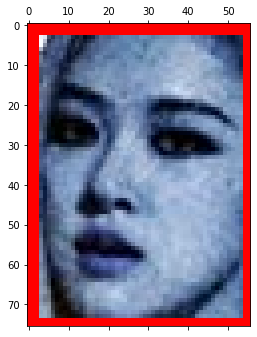

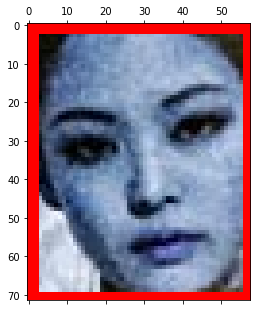

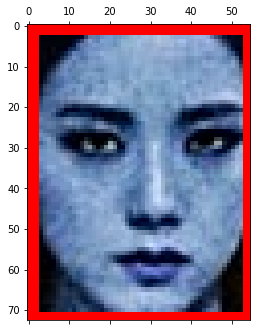

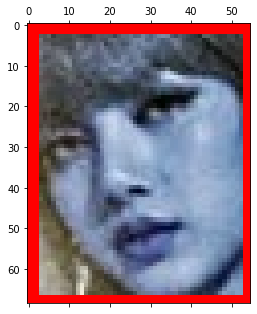

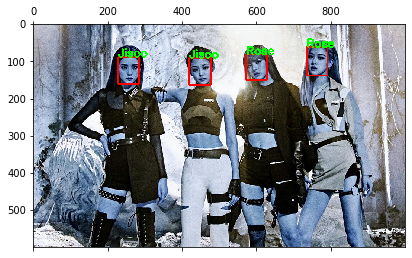

In [0]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
img_read = cv2.imread("/content/drive/My Drive/bp1.jpg")
# img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
face_locations = detector.detect_faces(img_read)
print(len(face_locations))
for face in zip(face_locations):
    (x, y, w, h) = face[0]['box']
    # landmarks = face[0]['keypoints']
    if x >= 0 and y >=0:
        cv2.rectangle(img_read,(x,y),(x+w,y+h),(255,0,0), 3)
        
        # for key, point in landmarks.items():
            # cv2.circle(img_read, point, 2, (255, 0, 0), 6)
        face = img_read[y:y+h, x:x+w]
        plt.matshow(face)
        # print(face)
        trans = transforms.Compose([
                transforms.Resize((128, 128)),
                transforms.ToTensor(),
                prewhiten
                ])
        face = Image.fromarray(np.uint8(face)).convert('L')
        face = trans(face)
        # print(face.shape)
        best_model = best_model.eval()
        log_ps = best_model(face.unsqueeze(0).cuda())
        # print(log_ps)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        print(top_class)

        if top_class[0][0] == 0:
            target = "Jennie"
        elif top_class[0][0] == 1:
            target = "Jisoo"
        elif top_class[0][0] == 2:
            target = "Lisa"
        elif top_class[0][0] == 3:
            target = "Rose"
        cv2.putText(img_read, target, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 3)
    else:
        print("negative face found")
plt.matshow(img_read)
cv2.imwrite("/content/bplabeled.jpg", img_read)

## save the trained best model

In [0]:
# save the best model under CE loss
torch.save(best_model.state_dict(), '/content/drive/My Drive/FacenetANLLlossBP800withprewhitenDEC030224.pt')
print("Best accuracy value: " + str(best_accu.item()) + "at epoch: " + str(best_epoch))

Best accuracy value: 0.8571428656578064at epoch: 54


##load model

In [0]:
catagories = 4
print("number of group members " + str(catagories))
model_load = FacenetA(1, catagories)
model_load.load_state_dict(torch.load( '/content/drive/My Drive/FacenetACElossBPGrabLimit400.pt'))
model_load.eval()
best_model = model_load.cuda()

number of group members 4


## plot Train Test loss and Test Accuracy

In [0]:
# plot train loss, test loss and accuracy
# epochs = 150
# test_losses = test_losses[:300]
# accuracy_lst = accuracy_lst[:300]
print(epochs)
epochs_lst = range(1, epochs + 1)
plt.ylim(0, 2)
plt.xlim(0,epochs + 50)
trainlossplt, = plt.plot(epochs_lst, train_losses, label='Train loss')
testlossplt, = plt.plot(epochs_lst, validate_losses, label='Test loss')
accuracyplt, = plt.plot(epochs_lst, accuracy_lst, label='validate accuracy')
trainaccuracyplt, = plt.plot(epochs_lst, train_accu_lst, label='train accuracy')
plt.legend(handles=[trainlossplt, testlossplt, accuracyplt, trainaccuracyplt])
plt.title("Train, test loss and train and validate accuracy")
# plt.show()
plt.savefig('/content/drive/My Drive/FacenetANLLlossBP800withprewhitenDEC030224.png')

300


# Use InceptionResnetV1 and fine tune using own data

In [0]:
!git clone https://github.com/timesler/facenet-pytorch.git

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 859, done.


## Define Dateset for fine tune

In [0]:
class FineTuneFaceDataset(Dataset):
    def __init__(self, root='/content/drive/My Drive/BP_faces/'):
        self.root_dir = root
        self.image = []
        self.annotation = []
        # self.image_color = []
        # transforms
        self.transform_with_normalization = transforms.Compose([
                transforms.Resize((128, 128)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5],
                                     std=[0.5] )
                ])
        self.transform_resize = transforms.Compose([             
                transforms.Resize((160, 160)),
                transforms.ToTensor(),
                prewhiten
                ])
        # load image
        catagories = ["Jennie", "Jisoo", "Lisa", "Rose"]
        for cnt, member in tqdm(enumerate(catagories)):
            print("member name: " + member + ", Catagory: " + str(cnt))
            img_lst = sorted(os.listdir(root + member + '/'))
            for img in tqdm(img_lst):
                if img.endswith(".jpg"):
                    # self.image_color.append(self.transform_color_image(Image.open(root + '/input/' + image)))
                    self.image.append(Image.open(root + member + '/' + img))
                    self.annotation.append(cnt)

    def __len__(self):
        return len(self.image)
                       
    def __getitem__(self, idx):
        image_trans = self.transform_with_normalization(self.image[idx])
        anno = self.annotation[idx]
        return image_trans, anno 



In [0]:
finetune = FineTuneFaceDataset()
test_set = 1
train_size = int(0.90 * len(finetune))
if test_set:
    validation_size = int((len(finetune) - train_size) / 2)
    test_size = len(finetune) - train_size - validation_size

    train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(finetune, [train_size, validation_size, test_size])

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=8, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True)
else:
    validation_size = int((len(finetune) - train_size))

    train_dataset, validation_dataset = torch.utils.data.random_split(finetune, [train_size, validation_size])

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=8, shuffle=True)





0it [00:00, ?it/s]




  0%|          | 0/250 [00:00<?, ?it/s]




 44%|████▎     | 109/250 [00:00<00:00, 1081.93it/s]

member name: Jennie, Catagory: 0







 87%|████████▋ | 217/250 [00:00<00:00, 1080.68it/s]




100%|██████████| 250/250 [00:00<00:00, 1102.32it/s]



1it [00:00,  4.15it/s]




  0%|          | 0/241 [00:00<?, ?it/s]




 45%|████▍     | 108/241 [00:00<00:00, 1074.36it/s]

member name: Jisoo, Catagory: 1







 88%|████████▊ | 211/241 [00:00<00:00, 1058.74it/s]




100%|██████████| 241/241 [00:00<00:00, 1045.96it/s]



2it [00:00,  4.14it/s]




  0%|          | 0/219 [00:00<?, ?it/s]




 47%|████▋     | 104/219 [00:00<00:00, 1036.38it/s]

member name: Lisa, Catagory: 2







 93%|█████████▎| 204/219 [00:00<00:00, 1023.67it/s]




100%|██████████| 219/219 [00:00<00:00, 963.87it/s] 



3it [00:00,  4.14it/s]




  0%|          | 0/268 [00:00<?, ?it/s]




 40%|███▉      | 107/268 [00:00<00:00, 1062.57it/s]

member name: Rose, Catagory: 3







 80%|███████▉  | 214/268 [00:00<00:00, 1060.71it/s]




100%|██████████| 268/268 [00:00<00:00, 990.16it/s] 



4it [00:01,  3.91it/s]





## define net and optimizer

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))
resnet = InceptionResnetV1(
    classify=True,
    pretrained='vggface2',
    num_classes=4
).to(device)

Running on device: cuda:0


In [0]:
optimizer = optim.Adam(resnet.parameters(), lr=0.003)
scheduler = MultiStepLR(optimizer, [5, 10])
loss_fn = torch.nn.CrossEntropyLoss()
metrics = {
    'fps': training.BatchTimer(),
    'acc': training.accuracy
}

In [0]:
!rm -rf ./logs

In [0]:
from os.path import join
import time
log_subdir = join('./logs', time.strftime("%Y-%m-%d-%H-%M-%S")) 
writer = SummaryWriter(log_dir=log_subdir)
print('Log subdirectory: ', log_subdir)
writer.iteration, writer.interval = 0, 10

Log subdirectory:  ./logs/2019-12-03-19-26-43


## train and eval

### use tensorboard version

In [0]:
print('\n\nInitial')
print('-' * 10)
finetune_epoch = 100
model_lst = []
resnet.eval()
training.pass_epoch(
    resnet, loss_fn, val_loader,
    batch_metrics=metrics, show_running=True, device=device,
    writer=writer
)

for epoch in range(finetune_epoch):
    print('\nEpoch {}/{}'.format(epoch + 1, finetune_epoch))
    print('-' * 10)

    resnet.train()
    training.pass_epoch(
        resnet, loss_fn, train_loader, optimizer, scheduler,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )

    resnet.eval()
    training.pass_epoch(
        resnet, loss_fn, val_loader,
        batch_metrics=metrics, show_running=True, device=device,
        writer=writer
    )

writer.close()

### This verison saves model with best validation rate

In [0]:
criterion = loss_fn
epochs = 100
loader = train_loader
    
train_losses, validate_losses, accuracy_lst, train_accu_lst = [], [], [], []
best_model = None
best_epoch = 0
best_accu = 0
for e in range(epochs):
    running_loss = 0
    resnet = resnet.train()
    train_accuracy = 0

    for images, labels in (loader):
        optimizer.zero_grad()
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        else: 
            print("no cuda")
        log_ps = resnet(images)
        loss = criterion(log_ps, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

    else:
        resnet = resnet.eval()
        validate_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in val_loader:
                if torch.cuda.is_available():
                  # print "cuda detected"
                    images = images.cuda()
                    labels = labels.cuda()
                else: 
                    print("no cuda")

                log_ps = resnet(images)
                # print(log_ps.shape, log_ps)
                ps = torch.exp(log_ps)
                
                loss = criterion(log_ps, labels)
                validate_loss += loss
                
                top_p, top_class = ps.topk(1, dim=1)
                # print(top_p, top_class)
                equals = top_class == labels.view(*top_class.shape)
                # print(labels, equals)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                # print(torch.mean(equals.type(torch.FloatTensor)))
        # print(accuracy)
        if accuracy/len(val_loader) > best_accu:
            best_model = copy.deepcopy(resnet)
            best_accu = accuracy/len(val_loader)
            best_epoch = e

        train_losses.append(running_loss/len(loader))
        validate_losses.append(validate_loss/len(val_loader))
        accuracy_lst.append(accuracy/len(val_loader))
        train_accu_lst.append(train_accuracy/len(loader))
        print("Epoch: {}/{}.. ".format(e+1, epochs))
        print("Training Loss: {:.3f}.. ".format(running_loss/len(loader)))
        print("Validate Loss: {:.3f}.. ".format(validate_loss/len(val_loader)))
        print("Train Accuracy: {:.3f}".format(train_accuracy/len(loader)))
        print("Validate Accuracy: {:.3f}".format(accuracy/len(val_loader)))
        

Epoch: 1/100.. 
Training Loss: 1.260.. 
Validate Loss: 1.019.. 
Train Accuracy: 0.408
Validate Accuracy: 0.571
Epoch: 2/100.. 
Training Loss: 1.223.. 
Validate Loss: 1.224.. 
Train Accuracy: 0.428
Validate Accuracy: 0.446
Epoch: 3/100.. 
Training Loss: 1.230.. 
Validate Loss: 1.036.. 
Train Accuracy: 0.449
Validate Accuracy: 0.696
Epoch: 4/100.. 
Training Loss: 1.123.. 
Validate Loss: 1.080.. 
Train Accuracy: 0.499
Validate Accuracy: 0.482
Epoch: 5/100.. 
Training Loss: 1.065.. 
Validate Loss: 1.126.. 
Train Accuracy: 0.516
Validate Accuracy: 0.446
Epoch: 6/100.. 
Training Loss: 1.066.. 
Validate Loss: 1.720.. 
Train Accuracy: 0.540
Validate Accuracy: 0.304
Epoch: 7/100.. 
Training Loss: 1.291.. 
Validate Loss: 1.139.. 
Train Accuracy: 0.394
Validate Accuracy: 0.446
Epoch: 8/100.. 
Training Loss: 1.214.. 
Validate Loss: 1.095.. 
Train Accuracy: 0.428
Validate Accuracy: 0.464
Epoch: 9/100.. 
Training Loss: 1.110.. 
Validate Loss: 1.021.. 
Train Accuracy: 0.526
Validate Accuracy: 0.589
E

## on testset

In [0]:
best_model = best_model.eval()
test_loss = 0
accuracy = 0
# Turn off gradients for validation, saves memory and computations
with torch.no_grad():
    for images, labels in test_loader:
        if torch.cuda.is_available():
            # print "cuda detected"
            images = images.cuda()
            labels = labels.cuda()
        else: 
            print("no cuda")

        log_ps = best_model(images)
        # print(log_ps.shape, log_ps)
        ps = torch.exp(log_ps)
        # print(ps)
        loss = criterion(log_ps, labels)
        test_loss += loss
        
        top_p, top_class = ps.topk(1, dim=1)
        # print(top_p, top_class)
        equals = top_class == labels.view(*top_class.shape)
        # print(labels, equals)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

print("Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)))
print("Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))


Test Loss: 0.349.. 
Test Accuracy: 0.875


## on test image

(2160, 3840, 3)
5
tensor([[0]], device='cuda:0')
tensor([[1]], device='cuda:0')
tensor([[3]], device='cuda:0')
tensor([[2]], device='cuda:0')
tensor([[0]], device='cuda:0')


True

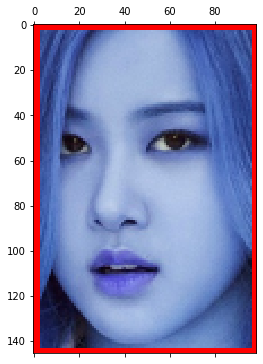

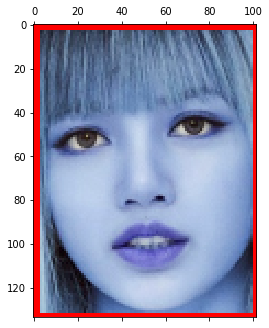

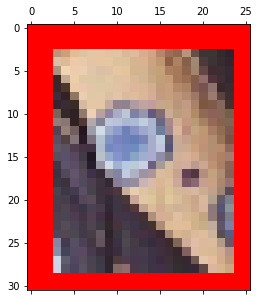

In [0]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
img_read = cv2.imread("/content/drive/My Drive/bp4k.jpg")
print(img_read.shape)
img_read = cv2.resize(img_read, (1920, 1080))
face_locations = detector.detect_faces(img_read)
print(len(face_locations))
for face in zip(face_locations):
    (x, y, w, h) = face[0]['box']
    # landmarks = face[0]['keypoints']
    if x >= 0 and y >=0:
        cv2.rectangle(img_read,(x,y),(x+w,y+h),(255,0,0), 3)
        
        # for key, point in landmarks.items():
            # cv2.circle(img_read, point, 2, (255, 0, 0), 6)
        face = img_read[y:y+h, x:x+w]
        plt.matshow(face)
        # print(face)
        trans = transforms.Compose([
                transforms.Resize((128, 128)),
                transforms.ToTensor()
                ])
        face = Image.fromarray(np.uint8(face))
        face = trans(face)
        # print(face.shape)
        log_ps = best_model(face.unsqueeze(0).cuda())
        # print(log_ps)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        print(top_class)

        if top_class[0][0] == 0:
            target = "Jennie"
        elif top_class[0][0] == 1:
            target = "Jisoo"
        elif top_class[0][0] == 2:
            target = "Lisa"
        elif top_class[0][0] == 3:
            target = "Rose"
        cv2.putText(img_read, target, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 3)
    else:
        print("negative face found")
plt.matshow(img_read)
cv2.imwrite("/content/bplabeled.jpg", img_read)

## save the trained best model

In [0]:
# save the best model under CE loss
torch.save(best_model.state_dict(), '/content/drive/My Drive/resnetepoch100DEC031518.pt')
print("Best accuracy value: " + str(best_accu.item()) + "at epoch: " + str(best_epoch))

Best accuracy value: 0.8392857313156128at epoch: 30


## plot Train Test loss and Test Accuracy

100


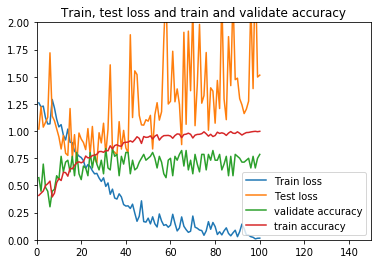

In [0]:
# plot train loss, test loss and accuracy
# epochs = 150
# test_losses = test_losses[:300]
# accuracy_lst = accuracy_lst[:300]
print(epochs)
epochs_lst = range(1, epochs + 1)
plt.ylim(0, 2)
plt.xlim(0,epochs + 50)
trainlossplt, = plt.plot(epochs_lst, train_losses, label='Train loss')
testlossplt, = plt.plot(epochs_lst, validate_losses, label='Test loss')
accuracyplt, = plt.plot(epochs_lst, accuracy_lst, label='validate accuracy')
trainaccuracyplt, = plt.plot(epochs_lst, train_accu_lst, label='train accuracy')
plt.legend(handles=[trainlossplt, testlossplt, accuracyplt, trainaccuracyplt])
plt.title("Train, test loss and train and validate accuracy")
# plt.show()
plt.savefig('/content/drive/My Drive/resnetepoch100DEC031518.png')

## Tensorboard

In [0]:
!pip install tensorboard
%load_ext tensorboard

In [0]:
%tensorboard --logdir=logs

Reusing TensorBoard on port 6006 (pid 3860), started 1:17:07 ago. (Use '!kill 3860' to kill it.)